### Data prep for the 1DCNN

In [3]:
import pandas as pd
import numpy as np
import os
#dev
import importlib as imp
import functions
from functions import *
import functions_data_prep
from functions_data_prep import *
import functions_data_viz
from functions_data_viz import *

In [4]:
BASE_PATH = "datasets/DAIC-WOZ/"
BASE_PATH_CUTS = "datasets/DAIC-WOZ/cuts/"
files = os.listdir(BASE_PATH+"/cuts")

In [26]:
def load_and_merge_mfcc(feature_path):
    # Construct the path to the .npz file

    
    # Load the data
    data = np.load(feature_path)
    
    # Initialize an empty list to collect all MFCC arrays
    mfcc_collections = []
    
    # Iterate through each item in the .npz file
    for i in range(len(data.files)):
        mfcc_collections.append(data[f'mfcc_{i}'])

    # Concatenate all MFCC arrays along the second dimension (time axis)
    concatenated_mfcc = np.concatenate(mfcc_collections, axis=1)
    
    return concatenated_mfcc

def save_concatenated_mfcc(patient_id, concatenated_mfcc, save_path):
    # Save the concatenated MFCC array
    np.savez(f"{save_path}concatenated_mfcc_{patient_id}.npz", mfcc=concatenated_mfcc)

def load_and_organize_features_mfcc(feature_path):
    # Load the aggregated features from .npz file (assuming it's already a .npz in your corrected script)
    mfcc_spectrums = np.load(feature_path)

    # Initialize a list to store MFCC data
    mfcc_data = []

    # Iterate over each file stored in the .npz
    for i in range(len(mfcc_spectrums.files)):
        data = mfcc_spectrums[f'mfcc_{i}']
        print(f"Shape of mfcc_{i}: {data.shape}")  # Debugging print to check each shape
        mfcc_data.append(data)

    # Determine the maximum length to standardize the dimensions
    max_length = max([m.shape[1] for m in mfcc_data])  # Assuming the time dimension is the second one

    # Standardize dimensions by padding with zeros
    standardized_data = [np.pad(m, ((0, 0), (0, max_length - m.shape[1])), mode='constant') for m in mfcc_data]

    return np.array(standardized_data)

In [43]:
for _, row in df.iterrows():
    try:
        patient_id =  row['Participant_ID']
        print(patient_id)
        # feature_path = BASE_PATH_CUTS+f"best_paper_features_only_mfcc_{str(patient_id)}.npy"
        feature_path = BASE_PATH_CUTS+f"best_paper_features_only_mfcc_{str(patient_id)}_mfcc.npz"
        print(feature_path)
        patient_mfcc_data = load_mfcc_data(feature_path)
        concatenated_mfcc = load_and_merge_mfcc(feature_path)
        save_path = "datasets/DAIC-WOZ/ConcatenatedMFCC/"
        save_concatenated_mfcc(patient_id, concatenated_mfcc, save_path)
        #organized_features = load_and_organize_features_mfcc(feature_path)
        # organized_features = load_and_organize_features_mfcc(feature_path)
        #print(organized_features)
    except Exception as e:
        print(f"Error processing patient {patient_id}: {e}")


303
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_303_mfcc.npz
304
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_304_mfcc.npz
305
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_305_mfcc.npz
310
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_310_mfcc.npz
312
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_312_mfcc.npz
313
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_313_mfcc.npz
315
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_315_mfcc.npz
316
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_316_mfcc.npz
317
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_317_mfcc.npz
318
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_318_mfcc.npz
319
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_319_mfcc.npz
320
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_320_mfcc.npz
321
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_321_mfcc.npz
322
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_322_mfcc.npz
324
datasets/DAIC-WO

In [32]:
patient_id = 304
# feature_path = BASE_PATH_CUTS+f"best_paper_features_only_mfcc_{str(patient_id)}.npy"
feature_path = BASE_PATH_CUTS+f"best_paper_features_only_mfcc_{str(patient_id)}_mfcc.npz"
print(feature_path)
patient_mfcc_data = load_mfcc_data(feature_path)
concatenated_mfcc = load_and_merge_mfcc(feature_path)
save_path = "test/"
save_concatenated_mfcc(patient_id, concatenated_mfcc, save_path)

datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_304_mfcc.npz


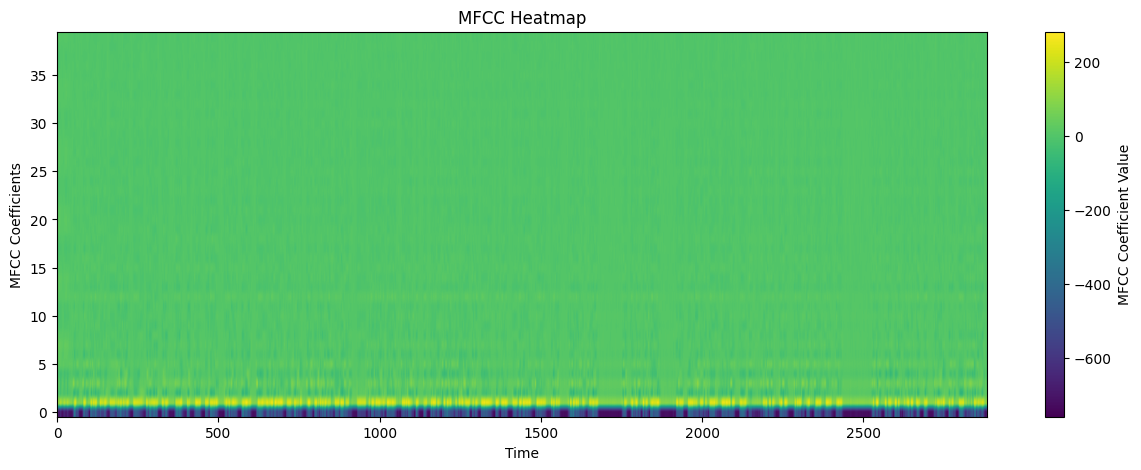

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def load_concatenated_mfcc(path):
    
    # Load the concatenated MFCC data
    data = np.load(path)
    return data['mfcc']

def visualize_mfcc(mfcc_data):
    # Plotting the MFCC data as a heatmap
    plt.figure(figsize=(15, 5))
    plt.imshow(mfcc_data, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='MFCC Coefficient Value')
    plt.title('MFCC Heatmap')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.show()



path = 'datasets/DAIC-WOZ/ConcatenatedMFCC/concatenated_mfcc_385.npz'  # specify where the concatenated MFCC is saved

concatenated_mfcc = load_concatenated_mfcc(path)
visualize_mfcc(concatenated_mfcc)

### MFCC

In [44]:
import librosa

audio_path = 'datasets/DAIC-WOZ/ExtractedFiles/385_AUDIO.wav'
# Load audio
y, sr = librosa.load(audio_path)

# MFCC features (they used MFC with multiple features)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # They used 40 MFCCs

In [45]:
mfccs.shape

(40, 23097)

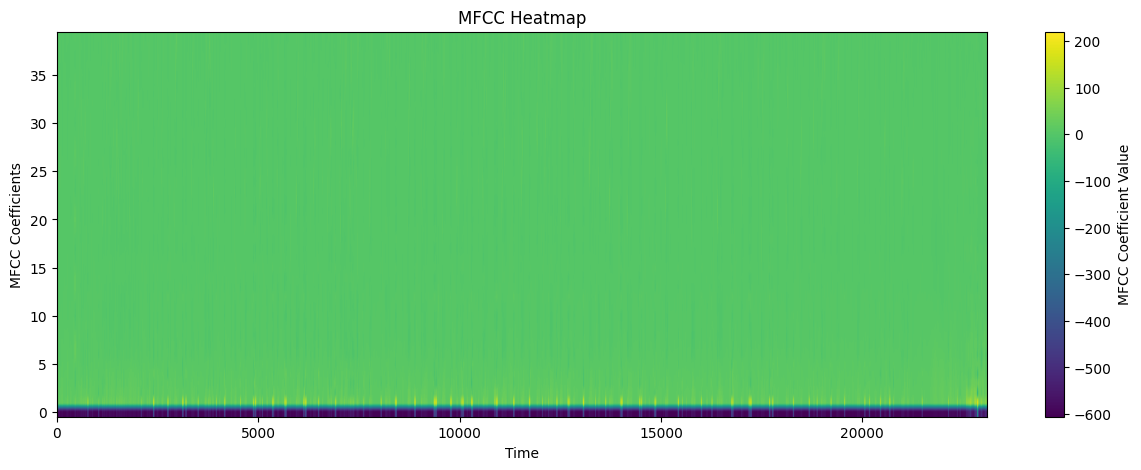

In [46]:
visualize_mfcc(mfccs)